In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # for plot heatmap
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score,auc,RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML Project/Billionaires01.csv')

In [ ]:
df.head().T

,0,1,2,3,4
rank,1,2,3,4,5
finalWorth,211000,180000,114000,107000,106000
category,Fashion & Retail,Automotive,Technology,Technology,Finance & Investments
personName,Bernard Arnault & family,Elon Musk,Jeff Bezos,Larry Ellison,Warren Buffett
age,74.0,51.0,59.0,78.0,92.0
country,France,United States,United States,United States,United States
city,Paris,Austin,Medina,Lanai,Omaha
source,LVMH,"Tesla, SpaceX",Amazon,Oracle,Berkshire Hathaway
industries,Fashion & Retail,Automotive,Technology,Technology,Finance & Investments
countryOfCitizenship,France,United States,United States,United States,United States


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    num_cols = df.select_dtypes(include=['float64','int64'])
    summ = pd.DataFrame(num_cols.dtypes, columns=['data type'])
    summ['#missing'] = num_cols.isnull().sum().values
    summ['%missing'] = num_cols.isnull().sum().values / len(df) * 100
    summ['#nunique'] = num_cols.nunique().values
    desc = pd.DataFrame(num_cols.describe(include='number').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values


    return summ
summary(df)

,data type,#missing,%missing,#nunique,min,max,average,standard_deviation
rank,int64,0,0.00,219,1.00,"2,540.00","1,289.16",739.69
finalWorth,int64,0,0.00,219,"1,000.00","211,000.00","4,623.79","9,834.24"
age,float64,65,2.46,79,18.00,101.00,65.14,13.26
birthYear,float64,76,2.88,77,"1,921.00","2,004.00","1,957.18",13.28
birthMonth,float64,76,2.88,12,1.00,12.00,5.74,3.71
birthDay,float64,76,2.88,31,1.00,31.00,12.10,9.92
cpi_country,float64,184,6.97,63,99.55,288.57,127.76,26.45
cpi_change_country,float64,184,6.97,44,-1.90,53.50,4.36,3.62
gross_tertiary_education_enrollment,float64,182,6.89,63,4.00,136.60,67.23,21.34
gross_primary_education_enrollment_country,float64,181,6.86,60,84.70,142.10,102.86,4.71


In [ ]:
df.select_dtypes(include=['object','bool']).describe().T

,count,unique,top,freq
category,2640,18,Finance & Investments,372
personName,2640,2638,Wang Yanqing & family,2
country,2602,78,United States,754
city,2568,741,New York,99
source,2640,906,Real estate,151
industries,2640,18,Finance & Investments,372
countryOfCitizenship,2640,77,United States,735
organization,325,294,Meta Platforms,4
selfMade,2640,2,True,1812
status,2640,6,D,1223


In [ ]:
df.drop(columns=['date','personName','city','source','industries','countryOfCitizenship','organization','lastName',
                 'firstName', 'title','residenceStateRegion'],inplace=True)

In [ ]:
print("There are {} missing values in the data.".format(df.isna().sum().sum()))


There are 4228 missing values in the data.


In [ ]:
for column in df:
    df[column]=df[column].fillna(method='ffill')

print("There are {} missing values in the data.".format(df.isna().sum().sum()))


There are 1 missing values in the data.


In [ ]:
for column in df:
    mode_value = df[column].mode()[0]
    df[column]=df[column].fillna(mode_value)

print("There are {} missing values in the data.".format(df.isna().sum().sum()))

There are 0 missing values in the data.


In [ ]:
print("There are {} duplicate values in the data.".format(df.duplicated().sum()))

There are 3 duplicate values in the data.


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df['birthYear']=df['birthYear'].astype(int)
df['birthMonth']=df['birthMonth'].astype(int)
df['birthDay']=df['birthDay'].astype(int)
df['birthDate']=pd.to_datetime(df['birthDate'])

In [ ]:
df['gdp_country'] = df['gdp_country'].str.replace('$','').replace(',','', regex=True).astype(float)

In [ ]:
from scipy import stats
num_outlier=[]
num_cols = df.select_dtypes(include=['float64','int64'])

for column in num_cols.columns:
    z = np.abs(stats.zscore(df[column]))
    threshold = 3
    outliers = df[z > threshold]
    num_outlier.append(len(outliers))
    df.drop(outliers.index,inplace=True)

df_outlier=pd.DataFrame({"column":num_cols.columns,"number_of_outliers":num_outlier})
df_outlier

,column,number_of_outliers
0,rank,0
1,finalWorth,37
2,age,6
3,birthYear,0
4,birthMonth,0
5,birthDay,0
6,cpi_country,46
7,cpi_change_country,0
8,gdp_country,0
9,gross_tertiary_education_enrollment,4


In [ ]:
df.drop(columns=['category','country','state','birthDate','birthDay','birthMonth','birthYear'],inplace=True)


In [ ]:
df['rank']=pd.cut(df['rank'],[0,500,1000,1500,2000,2600],labels=[1,2,3,4,5])

In [ ]:
y=df.selfMade
X=df.drop('selfMade', axis=1)
X=pd.get_dummies(X, columns=['status','gender'], drop_first=True)
pf = PolynomialFeatures(interaction_only=True, include_bias=False)
X_pf = pd.DataFrame(data=pf.fit_transform(X), columns=pf.get_feature_names_out(X.columns))
print("New data shape with interaction terms:",X_pf.shape)
X_pf.head()

New data shape with interaction terms: (2395, 210)


,rank,finalWorth,age,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,...,status_N status_R,status_N status_Split Family Fortune,status_N status_U,status_N gender_M,status_R status_Split Family Fortune,status_R status_U,status_R gender_M,status_Split Family Fortune status_U,status_Split Family Fortune gender_M,status_U gender_M
0,1.00,"33,400.00",54.00,125.08,2.90,"19,910,000,000,000.00",50.60,100.20,77.00,9.40,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,"32,600.00",74.00,105.48,0.50,"5,081,769,542,380.00",63.20,98.80,84.20,11.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,1.00,"32,100.00",65.00,119.62,1.70,"2,827,113,184,696.00",60.00,101.20,81.30,25.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,"31,600.00",74.00,117.24,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,1.00,"31,600.00",72.00,117.24,7.50,"21,427,700,000,000.00",88.20,101.80,78.50,9.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [ ]:
var_thr = VarianceThreshold(threshold = 0.25)

var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
concol = [column for column in X_pf.columns
          if column not in X_pf.columns[var_thr.get_support()]]

for features in concol:
    print(features)

status_E
status_N
status_R
status_Split Family Fortune
status_U
gender_M
status_E status_N
status_E status_R
status_E status_Split Family Fortune
status_E status_U
status_E gender_M
status_N status_R
status_N status_Split Family Fortune
status_N status_U
status_N gender_M
status_R status_Split Family Fortune
status_R status_U
status_R gender_M
status_Split Family Fortune status_U
status_Split Family Fortune gender_M
status_U gender_M


In [ ]:
X_pf.drop(concol,axis=1,inplace=True)
print("New data shape with interaction terms:",X_pf.shape)

New data shape with interaction terms: (2395, 189)


In [ ]:
scaler=StandardScaler()
X_pf=pd.DataFrame(scaler.fit_transform(X_pf), columns=X_pf.columns)

In [ ]:
X_train, X2, y_train, y2 = train_test_split(X_pf, y, train_size=0.5, shuffle=True,
                                            stratify=y, random_state=55)

X_val, X_test, y_val, y_test = train_test_split(X2, y2, test_size=0.5, shuffle=True,
                                                stratify=y2, random_state=55)

print("Train Shape:",X_train.shape)
print("Validation Shape:",X_val.shape)
print("Test Shape:",X_test.shape)

Train Shape: (1197, 189)
Validation Shape: (599, 189)
Test Shape: (599, 189)


In [ ]:
model= RandomForestClassifier()

train_score=[]
validation_score=[]
model.fit(X_train,y_train)
y_train_pred= model.predict(X_train)
train_score.append(f1_score(y_train_pred,y_train))
y_val_pred=model.predict(X_val)
validation_score.append(f1_score(y_val_pred,y_val))

In [ ]:
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import numpy as np

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Set random seed for reproducibility
random_state = 25
np.random.seed(random_state)

# Create RandomForestClassifier model
model = RandomForestClassifier(class_weight='balanced', random_state=random_state)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_val, y_train_val)

# Retrieve best model and parameters
best_model, best_params = grid_search.best_estimator_, grid_search.best_params_

# Retrain best model on the entire training set
best_model.fit(X_train_val, y_train_val)

# Evaluate performance on train set
f1_train = f1_score(best_model.predict(X_train_val), y_train_val)
y_test_pred = best_model.predict(X_test)
# Evaluate performance on test set
f1_test = f1_score(best_model.predict(X_test), y_test)

# Print results
print('F1-score on the train set:', f1_train)
print('F1-score on the test set:', f1_test)


F1-score on the train set: 0.9944620253164557
F1-score on the test set: 0.8455467869222096


<Figure size 640x480 with 0 Axes>

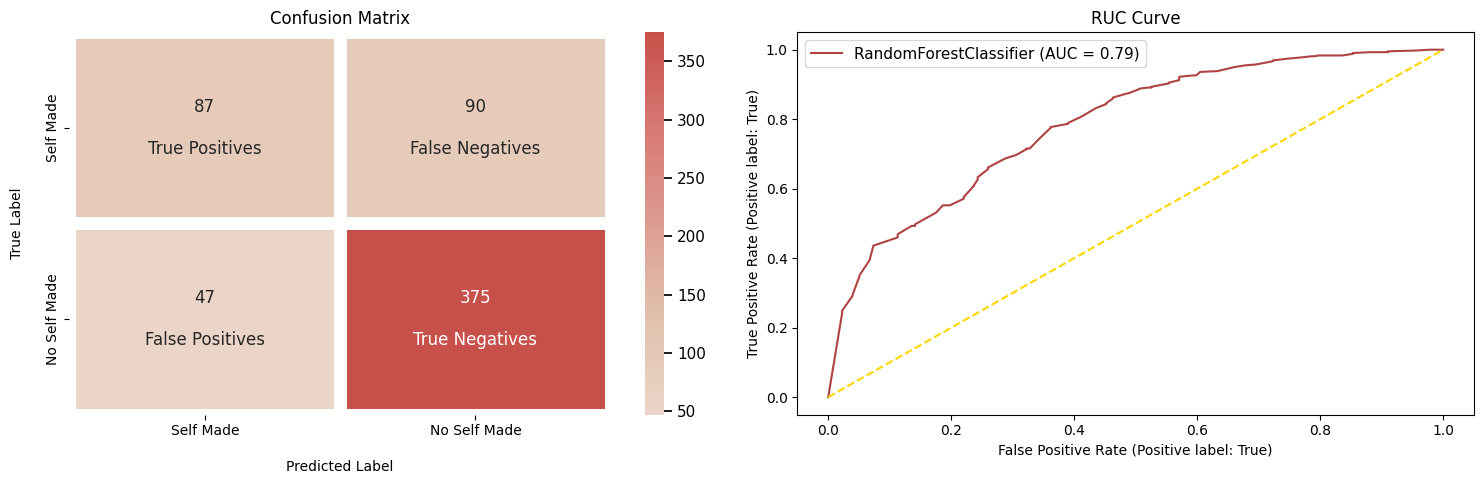

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

cm = confusion_matrix(y_test,y_test_pred ,labels=[0,1])
plt.subplots_adjust(hspace=0.5)
warm=LinearSegmentedColormap.from_list('warm',
                                       [(0, '#EBD5C8'),
                                        (0.25, '#E1C1AD'),
                                        (.75, '#D77873'),
                                        (1, '#C8504A')], N=256)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

classes=['Self Made','No Self Made']
label = ['True Positives', 'False Negatives', 'False Positives', 'True Negatives']
annot = [f'{i}\n\n{j}' for i, j in zip(cm.flatten(), label)]
annot = np.asarray(annot).reshape(2,2)

sns.set_context('notebook')
sns.heatmap(cm, annot=annot, fmt='', cmap=warm, linecolor='white', linewidths=8, ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('\nPredicted Label')
ax[0].set_ylabel('True Label\n')
ax[0].xaxis.set_ticklabels(classes)
ax[0].yaxis.set_ticklabels(classes)

# Subplot 2: AUC

y_proba= best_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
roc_auc = auc(fpr, tpr)
RocCurveDisplay.from_estimator(best_model, X_test, y_test,ax=ax[1],color="#AF4343")
sns.lineplot(x = [0, 1], y = [0, 1], color = 'gold', linestyle="dashed",ax=ax[1])
ax[1].set_title('RUC Curve')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

ft_importance = pd.DataFrame(index=X_pf.columns)
ft_importance['feature_importances'] = best_model.feature_importances_
ft_importance = ft_importance.feature_importances.nlargest(50).sort_values(ascending=True)

pal = sns.color_palette("Reds_r", 50).as_hex()
fig = go.Figure()

for i in range(len(ft_importance.index)):
    fig.add_shape(
        dict(
            type="line",
            y0=i,
            y1=i,
            x0=0,
            x1=ft_importance[i],
            line_color=pal[::-1][i],
            opacity=0.8,
            line_width=4
        )
    )

fig.add_trace(
    go.Scatter(
        x=ft_importance,
        y=ft_importance.index,
        mode='markers',
        marker_color=pal[::-1],
        marker_size=8,
        hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'
    )
)

fig.update_layout(
    title='Random Forest Feature Importance<br>Top 50',
    margin=dict(l=150, t=80),
    xaxis=dict(title='Importance', zeroline=False),
    yaxis_showgrid=False,
    height=1000,
    width=800
)

fig.show(renderer="colab")
